In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #ignora os avisos

In [34]:
pd.options.display.float_format = "{:,.2f}".format #ajusta o formato numérico exibido

Vamos começar importando nosso banco de dados. O arquivo csv que será lido no código abaixo foi gerado após uma consulta no site DATASUS. Eis o link, caso queira fazer a própria consulta:
http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi

A tabela mostra a produção hospitalar mensal (em reais) por unidade federativa, desde Janeiro de 2008 até Março de 2021

In [35]:
dados = pd.read_csv("/content/A144053189_28_143_208.csv", encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",")
dados

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,"1,388,528.39","2,931,283.42","1,541,682.52","1,525,314.96","1,645,953.84","1,406,150.68","3,065,279.01","3,231,494.61","3,117,178.63","3,068,430.44","2,825,838.52","2,931,173.58","2,885,269.07","2,860,103.74","3,684,944.68","3,607,289.68","3,774,356.60","3,706,711.84","3,763,187.55","3,533,625.83",3605007.43,"3,907,032.72","3,939,820.71","3,901,084.11","3,684,407.02","3,623,015.58","3,890,461.90","4,193,533.87","4,534,400.67","4,451,208.03","4,874,592.78","4,460,802.38","5,067,886.24","4,511,092.85","4,394,680.50","4,098,741.80","4,411,499.48","3,868,617.95","4,298,702.78",...,"7,998,345.94","8,893,683.69","8,867,793.32","8,871,408.50","8,501,601.67","8,315,107.81","8,525,499.78","9,177,611.46","7,368,996.38","8,835,095.43","8,328,186.64","8,408,512.77","9,351,705.82","8,143,007.97","8,949,741.77","9,630,553.15","9,581,970.31","7,891,114.05","9,792,370.67","9,170,787.53","8,816,846.71","10,024,554.15","9,675,423.70","8,085,025.66","9,222,010.60","7,493,901.30","8,148,169.46","7,353,768.37","7,739,864.47","9,246,097.96","11,824,687.13","11,733,307.76","10,201,985.14","7,955,139.45","9,357,946.29","8,880,836.55","9,266,014.59","7,730,597.04","11,023,309.47","996,411,254.68"
1,12 Acre,"902,416.00","1,497,206.26","1,794,028.48","1,730,469.42","1,819,443.92","1,828,496.00","2,511,754.59","2,089,107.14","2,275,708.53","1,923,886.57","1,756,986.80","2,235,639.98","2,497,116.43","2,253,558.01","2,122,673.92","2,834,317.62","2,722,065.97","2,432,831.95","2,630,190.65","2,307,579.00",-,"2,826,477.02","2,170,791.18","2,541,526.44","2,491,042.33","1,954,473.90","2,389,996.38","2,654,878.60","2,844,085.21","2,336,207.19","2,125,143.06","2,430,293.67","2,377,738.44","2,184,746.84","2,468,452.90","2,516,284.54","3,051,370.08","2,629,104.42","2,485,451.79",...,"3,576,595.19","2,444,567.37","2,602,434.35","3,064,163.42","2,276,236.69","3,239,474.10","3,126,429.88","2,998,865.51","2,619,709.86","3,018,048.94","3,342,614.24","2,123,426.26","2,664,654.52","1,906,429.95","3,096,439.63","2,411,628.00","2,840,630.58","3,260,153.59","3,250,722.84","3,204,998.88","3,052,745.65","3,124,802.29","3,021,521.75","2,874,871.28","3,331,803.55","3,417,691.07","3,076,003.20","2,286,642.60","2,896,340.24","3,045,245.80","3,915,193.20","3,640,142.82","3,391,242.21","4,044,321.44","3,276,590.10","3,696,997.31","3,715,723.12","3,538,427.92","4,077,045.92","450,048,530.47"
2,13 Amazonas,"4,735,529.42","7,118,990.57","8,196,635.49","8,259,378.42","7,831,399.90","8,477,273.62","9,368,858.72","9,352,532.70","9,363,099.35","8,618,318.83","6,555,549.08","7,777,645.88","7,403,068.36","6,683,346.89","9,927,781.20","8,844,511.21","9,079,035.96","8,832,894.53","9,373,395.97","9,578,326.03",9730634.16,"9,179,252.65","8,314,648.93","9,050,439.39","9,419,460.86","8,680,178.57","9,168,055.41","9,897,901.80","9,651,362.37","10,854,599.47","10,417,122.89","8,718,347.13","8,221,592.12","9,613,977.03","9,927,574.41","9,470,661.21","9,736,750.91","8,745,259.80","9,380,112.36",...,"13,572,263.03","13,083,081.70","14,322,305.22","14,643,340.51","14,632,208.09","14,500,521.14","14,840,533.42","14,427,620.91","15,818,964.25","16,358,462.57","15,391,163.74","14,154,362.85","16,791,397.31","14,369,987.43","16,339,024.96","15,622,910.63","16,483,166.92","

Vejamos a média dos dados:

In [36]:
dados.mean()

2008/Jan      15,126,846.64
2008/Fev      22,710,158.12
2008/Mar      24,594,187.35
2008/Abr      25,431,957.83
2008/Mai      26,511,245.91
                 ...       
2020/Dez      53,377,763.15
2021/Jan      56,073,748.02
2021/Fev      55,578,233.31
2021/Mar      62,502,301.42
Total      6,388,213,338.48
Length: 159, dtype: float64

Se quisermos, podemos consultar a média de apenas um dos meses:

In [13]:
dados['2008/Ago'].mean()

27800320.306666665

É possível consultar também a média por unidade da federação. Para isso, podemos passar o parâmetro axis = 1 na função mean()

In [32]:
dados.mean(axis = 1)

0     12510801.90
1      5660987.80
2     24055127.28
3      4126115.21
4     59010377.58
5      3884816.70
6     12789393.88
7     48568654.72
8     28613399.86
9     82699381.89
10    33377548.66
11    32790694.40
12   107700684.80
13    28060754.41
14    15253864.33
15   122825434.42
16   256229962.25
17    42744145.12
18   129702859.17
19   519326513.43
20   184259028.86
21    98318502.79
22   160140612.27
23    29163851.68
24    27354900.26
25    62402008.69
26    32517978.95
dtype: float64

Poodemos filtrar a análise acima por estado, digamos, Ceará (meu estado natal):

In [33]:
dados[dados['Unidade da Federação'] == '23 Ceará'].mean(axis = 1)

9   82699381.89
dtype: float64

Agora vamos criar alguns gráficos. Primeiramente, gráficos de barra com informações dos gastos por estado em Agosto de 2008 e Março de 2021.

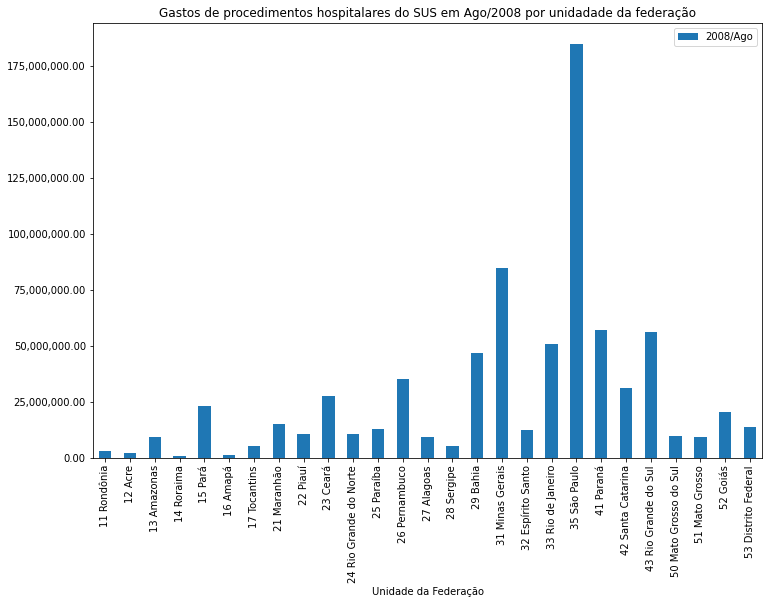

In [23]:
import matplotlib.ticker as ticker

ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind = 'bar', figsize = (12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title('Gastos de procedimentos hospitalares do SUS em Ago/2008 por unidadade da federação')
plt.show()

2021/Mar

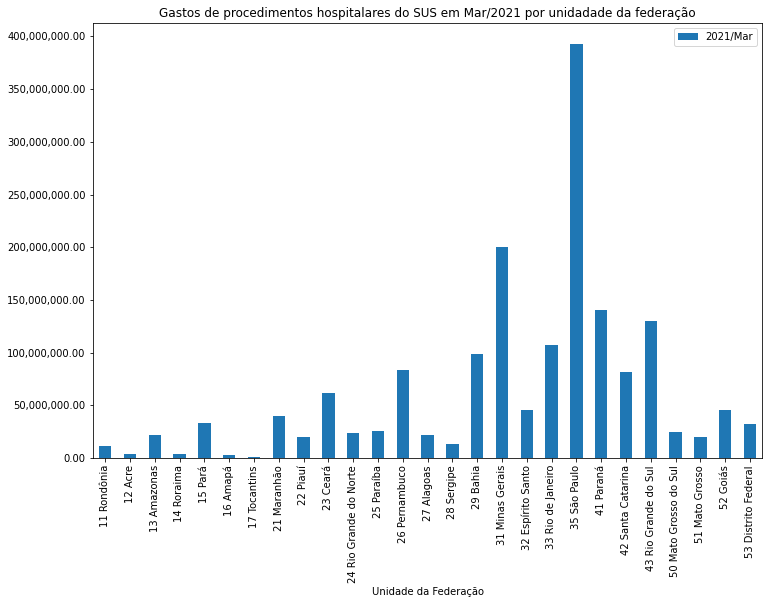

In [24]:
ax = dados.plot(x="Unidade da Federação", y="2021/Mar", kind = 'bar', figsize = (12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title('Gastos de procedimentos hospitalares do SUS em Mar/2021 por unidadade da federação')
plt.show()

Podemos visualizar graficamente a evolução dos gastos ao longo dos meses em um estado específico (e.g., Ceará).

In [118]:
gastos_CE = dados.iloc[9][1:160].astype(float) #pegamos de 1 a 160 para excluir as colunas 'unidade da federação' e 'total'. Usamos o astype(float) pois há entradas que são string.
gastos_CE

2008/Jan   15,539,821.90
2008/Fev   25,735,101.55
2008/Mar   28,724,625.75
2008/Abr   30,676,457.06
2008/Mai   30,604,453.47
                ...     
2020/Nov   56,916,499.66
2020/Dez   50,849,353.22
2021/Jan   52,078,218.88
2021/Fev   53,171,253.41
2021/Mar   62,079,618.54
Name: 9, Length: 159, dtype: float64

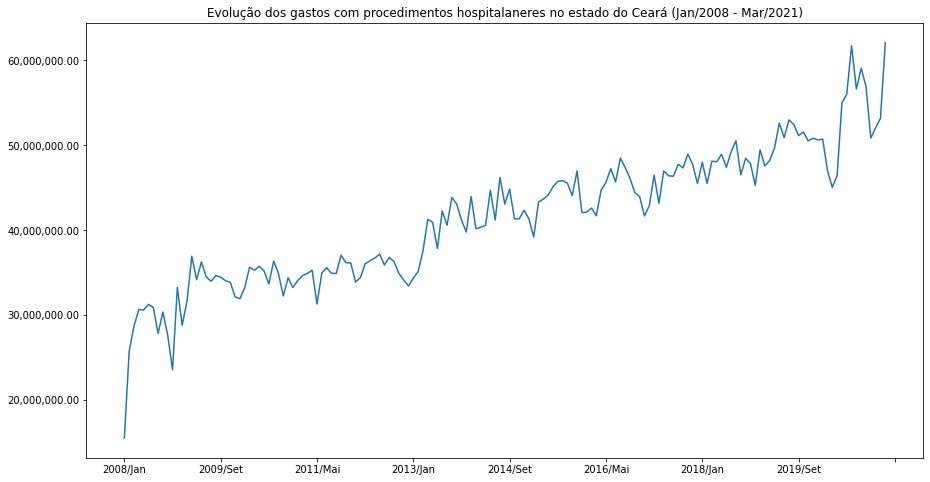

In [124]:
ax = gastos_CE.plot(figsize = (15,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title('Evolução dos gastos com procedimentos hospitalaneres no estado do Ceará (Jan/2008 - Mar/2021)')
plt.show()

Observamos então que há uma tendência de aumento dos gastos. 